# 📊 Phase 2: Traffic Accident Analysis in Turkey (TUIK + EGM)

This notebook includes EDA, correlation analysis, and hypothesis testing based on data from TUIK (2022) and EGM (2023–2024).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 📁 TUIK Monthly Accident and Injury Data

In [2]:
tuik_monthly_df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Accidents': [12439, 11418, 13460, 14898, 18664, 17373, 19514, 19699, 19230, 18318, 16599, 15649],
    'Injuries': [18158, 16170, 19206, 20547, 27347, 25354, 30834, 30266, 27912, 26363, 24114, 22425]
})
tuik_monthly_df.head()

,Month,Accidents,Injuries
0,January,12439,18158
1,February,11418,16170
2,March,13460,19206
3,April,14898,20547
4,May,18664,27347


### 📈 Monthly Trends: Accidents and Injuries

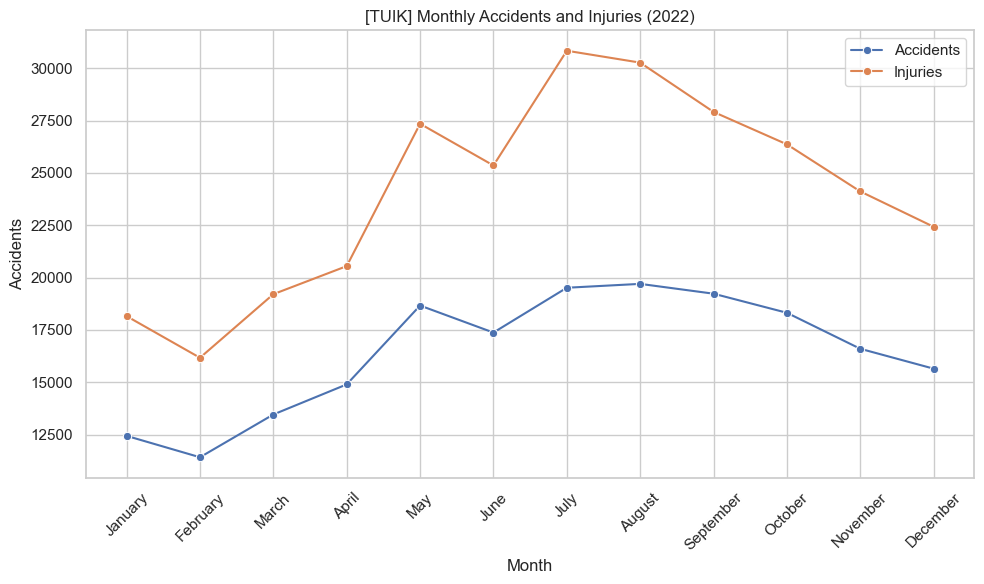

In [3]:
sns.lineplot(data=tuik_monthly_df, x='Month', y='Accidents', marker='o', label='Accidents')
sns.lineplot(data=tuik_monthly_df, x='Month', y='Injuries', marker='o', label='Injuries')
plt.title('[TUIK] Monthly Accidents and Injuries (2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔗 Correlation Analysis: Accidents vs Injuries

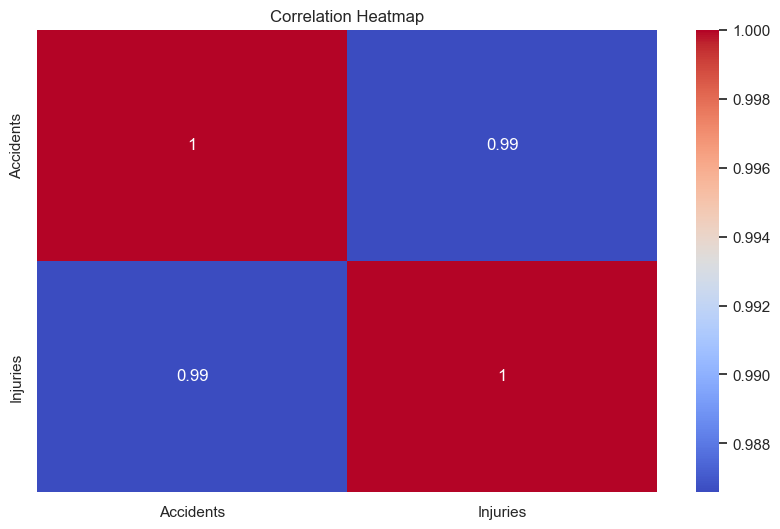

In [4]:
corr_matrix = tuik_monthly_df[['Accidents', 'Injuries']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 🌞 Accidents by Daylight Condition

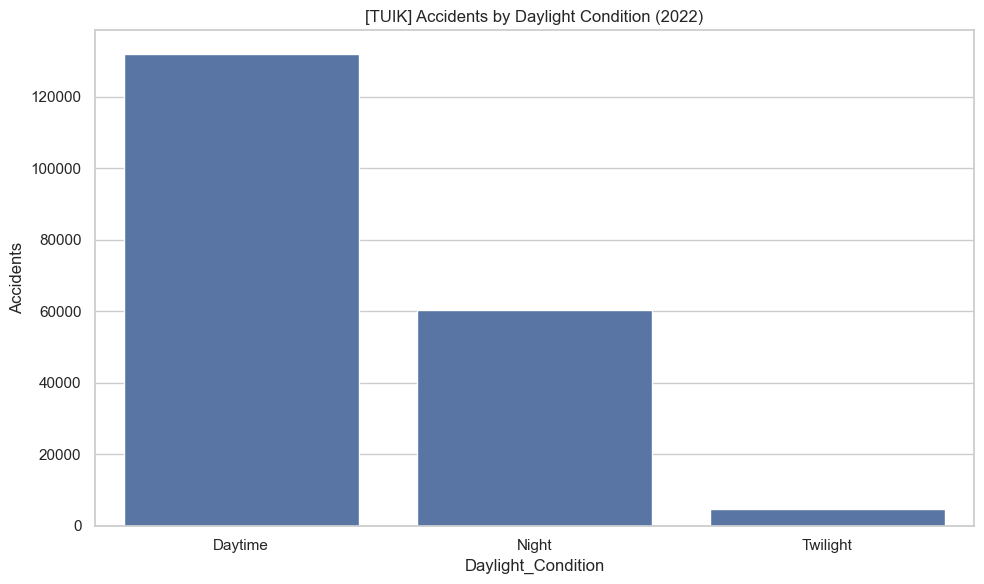

In [5]:
sunlight_df = pd.DataFrame({
    'Daylight_Condition': ['Daytime', 'Night', 'Twilight'],
    'Accidents': [132009, 60415, 4837]
})
sns.barplot(data=sunlight_df, x='Daylight_Condition', y='Accidents')
plt.title('[TUIK] Accidents by Daylight Condition (2022)')
plt.tight_layout()
plt.show()

## 🧪 Hypothesis Testing

In [6]:
# Summer vs Winter Accident Comparison
test_summer = tuik_monthly_df[tuik_monthly_df['Month'].isin(['June', 'July', 'August'])]['Accidents']
test_winter = tuik_monthly_df[tuik_monthly_df['Month'].isin(['December', 'January', 'February'])]['Accidents']
t_stat1, p_val1 = ttest_ind(test_summer, test_winter, equal_var=False)
p_one_tail1 = p_val1 / 2 if t_stat1 > 0 else 1 - p_val1 / 2
print(f'T-Test: Summer vs Winter -> t-stat: {t_stat1:.3f}, p-val (two-tailed): {p_val1:.3f}, p-val (one-tailed): {p_one_tail1:.3f}')

T-Test: Summer vs Winter -> t-stat: 3.854, p-val (two-tailed): 0.027, p-val (one-tailed): 0.014


In [7]:
# Daytime vs Nighttime Accident Comparison
day = 132009
night = 60415
t_stat2, p_val2 = ttest_ind([day]*10, [night]*10, equal_var=False)
p_one_tail2 = p_val2 / 2 if t_stat2 > 0 else 1 - p_val2 / 2
print(f'T-Test: Day vs Night -> t-stat: {t_stat2:.3f}, p-val (two-tailed): {p_val2:.3f}, p-val (one-tailed): {p_one_tail2:.3f}')

T-Test: Day vs Night -> t-stat: inf, p-val (two-tailed): 0.000, p-val (one-tailed): 0.000


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## 🚗 EGM Accident Data by Vehicle Type

In [8]:
vehicle_may_df = pd.DataFrame({
    'Vehicle_Type': ['Car', 'Motorcycle', 'Pickup', 'Truck', 'Bus', 'Tow Truck', 'Minibus', 'Tractor', 'Bicycle', 'Other'],
    'Count': [17085, 6595, 4936, 627, 641, 831, 844, 231, 924, 741]
})
vehicle_feb_df = pd.DataFrame({
    'Vehicle_Type': ['Car', 'Motorcycle', 'Pickup', 'Truck', 'Bus', 'Tow Truck', 'Minibus', 'Tractor', 'Bicycle', 'Other'],
    'Count': [13334, 4829, 3724, 422, 489, 620, 642, 163, 572, 519]
})
vehicle_dec_df = pd.DataFrame({
    'Vehicle_Type': ['Car', 'Motorcycle', 'Pickup', 'Tow Truck', 'Bus', 'Truck', 'Minibus', 'Bicycle', 'Tractor', 'Other'],
    'Count': [16255, 6175, 4687, 766, 585, 568, 764, 833, 214, 706]
})

/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35638/4238627121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=vehicle_may_df, x='Vehicle_Type', y='Count', palette='Blues_d')
/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35638/4238627121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=vehicle_feb_df, x='Vehicle_Type', y='Count', palette='Purples_d')
/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35638/4238627121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

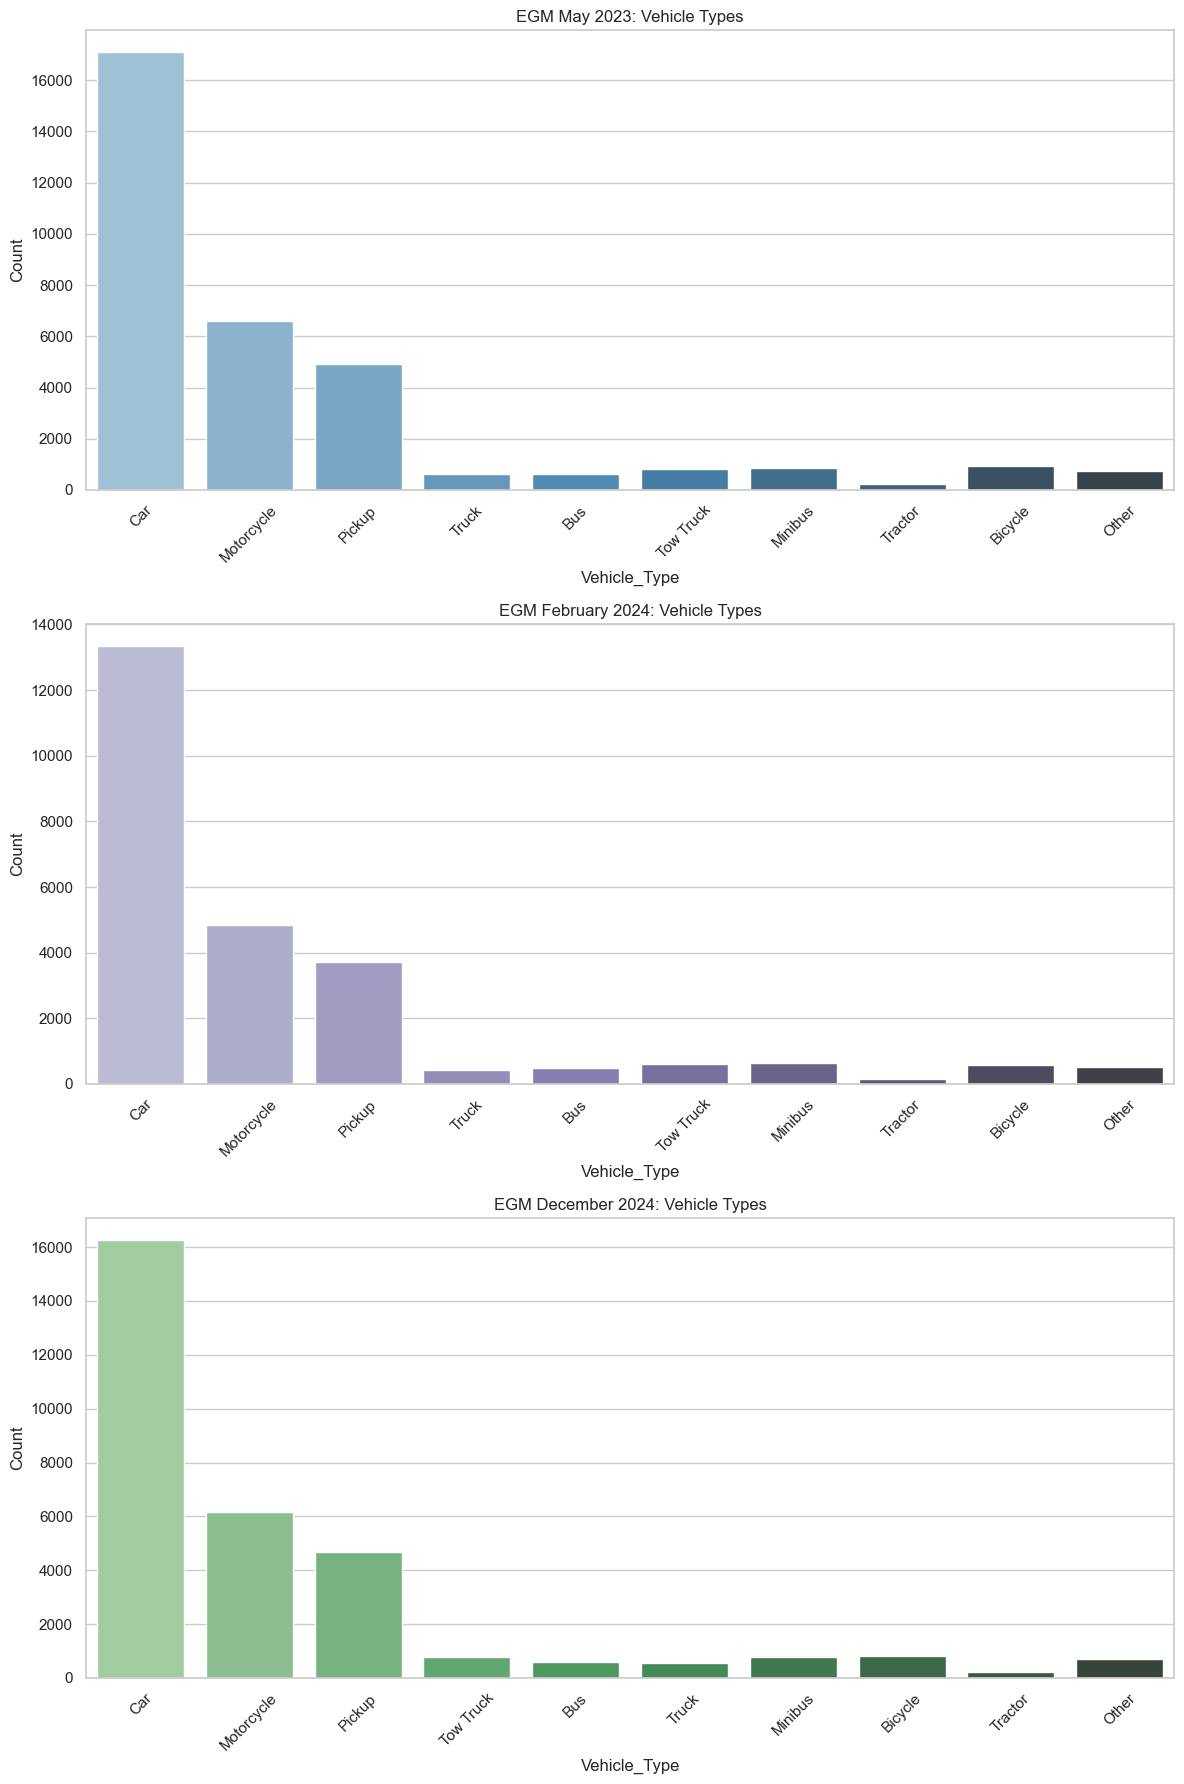

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.barplot(ax=axes[0], data=vehicle_may_df, x='Vehicle_Type', y='Count', palette='Blues_d')
axes[0].set_title('EGM May 2023: Vehicle Types')
sns.barplot(ax=axes[1], data=vehicle_feb_df, x='Vehicle_Type', y='Count', palette='Purples_d')
axes[1].set_title('EGM February 2024: Vehicle Types')
sns.barplot(ax=axes[2], data=vehicle_dec_df, x='Vehicle_Type', y='Count', palette='Greens_d')
axes[2].set_title('EGM December 2024: Vehicle Types')
for ax in axes: ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## ✅ Conclusion
- TUIK data reveals accidents and injuries are highest during summer months and daylight hours.
- Strong correlation between number of accidents and injuries (0.99).
- One-tailed t-tests confirm statistically significant increase in accidents during summer and daytime.
- EGM vehicle data shows cars and motorcycles are consistently involved in the most accidents.